In [141]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [142]:
!ls 

test_identity.csv     train_identity.csv    未命名.ipynb
test_transaction.csv  train_transaction.csv


In [143]:
#read data
train_identity = pd.read_csv("./train_identity.csv")
train_transaction = pd.read_csv("./train_transaction.csv")

test_identity = pd.read_csv("./test_identity.csv")
test_transaction = pd.read_csv("./test_transaction.csv")

#transaction数据维度理解

In [144]:
print(train_transaction.head())
print(train_transaction.shape)
#(590540, 394)

#观察transaction维度及数据类型
for i in train_transaction.columns:
    #print(i,train_transaction[i].dtype,end = '|')
    
    #14个维度为'object'类型
    if train_transaction[i].dtype == 'object':
        print(i,train_transaction[i].dtype,end = '|')
#columns
#TransactionID isFraud TransactionDT TransactionAmt ProductCD 
#card1 card2 card3 card4 card5 card6 
#addr1 addr2 dist1 dist2 
#P_emaildomain R_emaildomain
#C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14
#D1 D2 D3 D4 D5 D6 D7 D8 D9 D10 D11 D12 D13 D14 D15
#M1 M2 M3 M4 M5 M6 M7 M8 M9
#V1-V339 

#object 
#ProductCD, card4, card6, P_emaildomain, R_emaildomain, M1 M2 M3 M4 M5 M6 M7 M8 M9

#columns description
#TransactionDT:timedelta timestamp 时间戳间隔
#TransactionAmt:transaction payment amount 交易总金额
#ProductCD:product code 交易产品编号
#card1-card6：交易卡信息
#addr1 addr2：交易地点经纬？
#dist1 dist2 ：distance ？
#P_emaildomain R_emaildomain：购买者和收件人的电子邮件域
#C1-C14：计数，例如发现与支付卡相关联的地址数等，实际含义被掩盖
#D1-D15：上次交易之间的天数等
#M1-M9：交易卡上信息
#V1-V339 ：？？排名计数



   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...  V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...   NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...   0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN  

结论：1.transaction表大小为：(590540, 394)，
     2.transaction表中'object'数据类型字段包括：ProductCD, card4, card6, P_emaildomain, R_emaildomain, M1 M2 M3 M4 M5 M6 M7 M8 M9

#identity数据维度理解

In [145]:
print(train_identity.columns)

train_identity.shape
#(144233, 41)

for i in train_identity.columns:  
    if train_identity[i].dtype == 'object':
        print(i,train_identity[i].dtype,end = '|')

#'TransactionID'： 交易ID
# 'id_01'-'id_38'：交易相关的身份信息
# 'DeviceType', 'DeviceInfo'：设备类型和设备说明

#object类型
#id_12 ,id_15-id_16,id-23,id_27-id-31,id_33-id_38,DeviceType,DeviceInfo

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')
id_12 object|id_15 object|id_16 object|id_23 object|id_27 object|id_28 object|id_29 object|id_30 object|id_31 object|id_33 object|id_34 object|id_35 object|id_36 object|id_37 object|id_38 object|DeviceType object|DeviceInfo object|

结论：1.identity表大小为：(144233, 41)
     2.identity表中'object'数据类型字段包括：id_12 ,id_15-id_16,id-23,id_27-id-31,id_33-id_38,DeviceType,DeviceInfo

#EDA

In [146]:
train_transaction.isnull().sum()#TransactionID  isFraud 无缺失
train_transaction.TransactionID.value_counts().count()#train_transaction TransactionID 无重复值

train_identity.TransactionID.nunique()#train_identity TransactionID 无重复值
train_identity.isnull().sum()#TransactionID无缺失

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [198]:
#merge transaction and identity
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

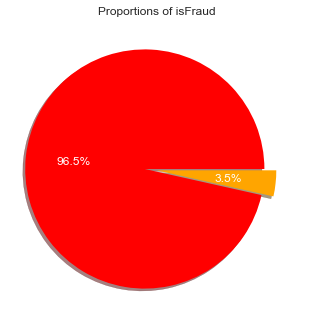

In [148]:
train.head()
labels = train.isFraud.value_counts().index
isFraud_value = train.isFraud.value_counts()

plt.axes(aspect='equal')

plt.pie(isFraud_value,
        explode=(0.1,0),
        labels = labels,
        colors=['red','orange'],
        shadow=True,
        autopct="%1.1f%%",
        radius=1.0,
        textprops= {'fontsize':12,'color':'white'})

plt.title('Proportions of isFraud')
plt.show()

结论：样本不均衡，欺诈用户仅占比3.5%，使用机器学习算法时，应该考虑解决样本不均衡问题。

In [149]:
print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'])))
#print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'])))

144233


In [150]:
# 以 f开头表示在字符串内支持大括号内的python 表达式
print(f"Train dataset has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test dataset has {test.shape[0]} rows and {test.shape[1]} columns")

Train dataset has 590540 rows and 434 columns
Test dataset has 506691 rows and 433 columns


In [151]:
print(f"Train dataset has {train.isnull().any().sum()} missing value colunms")

Train dataset has 414 missing value colunms


In [152]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]

In [153]:
print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_cols_test)} columns in test dataset with one unique value.')

There are 0 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


结论：合并transaction表和identity表后，训练数据train大小为：（590540，434），434个维度中414个维度都含有空值，
     并且由于transaction表和identity表大小不匹配，合并后的训练数据含有大量空值。

#train_identity EDA

In [154]:
for i in train_identity.columns:  
    if train_identity[i].dtype == 'object':
        print(i,train_identity[i].dtype,end = '|')

id_12 object|id_15 object|id_16 object|id_23 object|id_27 object|id_28 object|id_29 object|id_30 object|id_31 object|id_33 object|id_34 object|id_35 object|id_36 object|id_37 object|id_38 object|DeviceType object|DeviceInfo object|

id_01 has 77 non-positive values


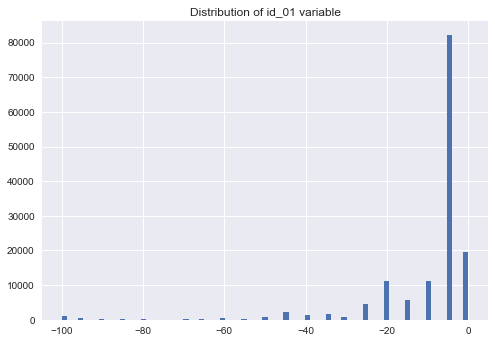

In [155]:
#id_01分布
print(f"id_01 has {train['id_01'].value_counts().count()} non-positive values")
plt.hist(x = train['id_01'].dropna(inplace = False), bins=77)
plt.title('Distribution of id_01 variable')

In [156]:
#id_03分布
train.id_03.value_counts(dropna=False,normalize = True).head(10)
#id_03 has 88% of missing values and 98% of values are either missing or equal to 0

NaN     0.887689
 0.0    0.108211
 1.0    0.001461
 3.0    0.001131
 2.0    0.000713
 5.0    0.000185
 4.0    0.000169
 6.0    0.000108
-5.0    0.000056
-6.0    0.000052
Name: id_03, dtype: float64

In [157]:
#id_11分布
train.id_11.value_counts(dropna=False,normalize = True).head(10)
#22% of values in id_11 are equal to 100and 76% are missing.

NaN            0.761273
 100.000000    0.225492
 95.080002     0.002085
 95.160004     0.001277
 97.120003     0.000745
 96.669998     0.000564
 95.650002     0.000484
 96.190002     0.000408
 94.290001     0.000386
 93.550003     0.000345
Name: id_11, dtype: float64

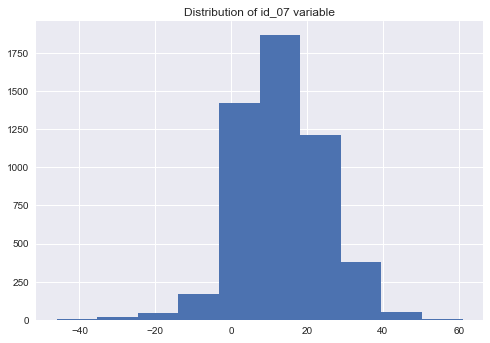

In [158]:
#id_07分布
plt.hist(train['id_07'].dropna(inplace = False));
plt.title('Distribution of id_07 variable');

#对每个object类型进行梳理
#id_12 ,id_15-id_16,id-23,id_27-id-31,id_33-id_38,DeviceType,DeviceInfo

#id_12 NotFound Found Null
#id_16 NotFound Found Null
#id_27 NotFound Found Null
#id_29 NotFound Found Null

#id_15 Found New Unkown null

#id_23 IP_PROXY:TRANSPARENT IP_PROXY:ANONYMOUS IP_PROXY:HIDDEN null

#id_28 Found Null New


#id_30 null some kinds of computer system 
#id_31 null some kinds of browers
#id_33 null some kinds of Screen Resolution

#id_34 null match_status:-1 match_status:0 match_status:1 match_status:2

#id_35 null T F
#id_36 null T F
#id_37 null T F
#id_38 null T F

In [159]:
train['id_15'].value_counts(dropna = False)

NaN        449555
Found       67728
New         61612
Unknown     11645
Name: id_15, dtype: int64

In [160]:
import altair as alt

for i in ['id_12', 'id_16','id_27', 'id_29']:
    feature_count = train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    display(chart)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [161]:
for i in ['id_15', 'id_28']:
    feature_count = train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    display(chart)

alt.Chart(...)

alt.Chart(...)

In [162]:
for i in ['id_23', 'id_34']:
    feature_count = train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    display(chart)

alt.Chart(...)

alt.Chart(...)

In [163]:
for i in ['id_35', 'id_36','id_37','id_38']:
    feature_count = train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    display(chart)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [164]:
for i in ['id_30', 'id_31']:
    feature_count = train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                x=alt.X(f"{i}:N", axis=alt.Axis(title=i)),
                y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=1600)
    display(chart)

alt.Chart(...)

alt.Chart(...)

In [165]:
train['id_33'].value_counts()

1920x1080    16874
1366x768      8605
1334x750      6447
2208x1242     4900
1440x900      4384
1600x900      3510
2048x1536     3482
1280x800      2149
2560x1600     2093
2560x1440     1865
2880x1800     1756
1280x1024     1743
1680x1050     1727
1136x640      1712
2436x1125     1484
1280x720      1318
1920x1200     1056
2001x1125     1020
1024x768       824
2220x1080      544
5120x2880      397
3360x2100      380
2732x2048      354
1366x767       335
3840x2160      263
855x480        250
2736x1824      241
1360x768       224
4096x2304      208
2224x1668      194
             ...  
1280x740         1
6400x3600        1
2048x1080        1
1536x1152        1
2999x2000        1
1440x800         1
1658x946         1
2736x1823        1
3838x2158        1
5040x3150        1
2559x1439        1
1700x960         1
1502x845         1
1281x800         1
3520x1980        1
1596x710         1
2048x1278        1
1359x768         1
1400x900         1
2160x1439        1
1511x944         1
1062x630    

In [166]:
for i in ['id_35', 'id_36','id_37', 'id_38']:
    feature_count = train[i].value_counts(dropna=False).reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
                x=alt.X('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=400)
    display(chart)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

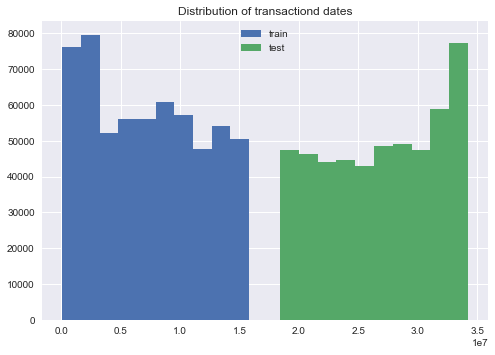

In [167]:
plt.hist(train['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

#train transaction EDA

In [168]:
#ProductCD, card4, card6, P_emaildomain, R_emaildomain, M1 M2 M3 M4 M5 M6 M7 M8 M9

In [169]:
#columns description
#TransactionDT:timedelta timestamp 时间戳间隔
#TransactionAmt:transaction payment amount 交易总金额
#ProductCD:product code 交易产品编号
#card1-card6：交易卡信息
#addr1 addr2：交易地点经纬？
#dist1 dist2 ：distance ？
#P_emaildomain R_emaildomain：购买者和收件人的电子邮件域
#C1-C14：计数，例如发现与支付卡相关联的地址数等，实际含义被掩盖
#D1-D15：上次交易之间的天数等
#M1-M9：交易卡上信息
#V1-V339 ：？？排名计数

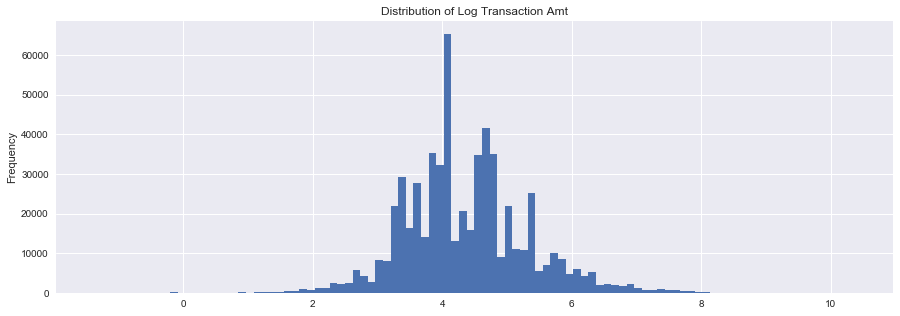

In [170]:
#交易金额分布
train['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribution of Log Transaction Amt')
plt.show()

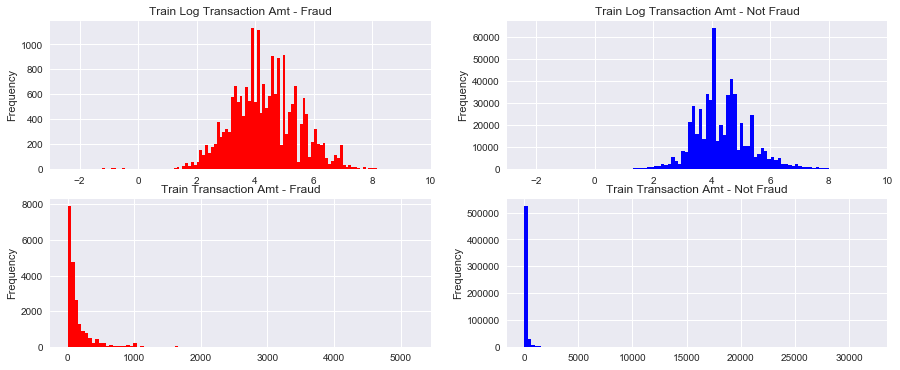

In [171]:
#交易金额分布 划分fraud 和 not fraud
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))

train[train['isFraud'] == 1]['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Train Log Transaction Amt - Fraud',
          color='red',
          xlim=(-3, 10),
         ax= ax1)
train[train['isFraud'] == 0]['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Train Log Transaction Amt - Not Fraud',
          color='blue',
          xlim=(-3, 10),
         ax= ax2)

train[train['isFraud'] == 1]['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Train Transaction Amt - Fraud',
          color='red',
         ax= ax3)

train[train['isFraud'] == 0]['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Train Transaction Amt - Not Fraud',
          color='blue',
         ax= ax4)
plt.show()

In [172]:
#有欺诈行为的交易均值
print("Mean amount fot fraud is {:.4f}".format(train[train['isFraud'] == 1]['TransactionAmt'].mean()))
#无欺诈行为的交易均值
print("Mean amount fot not fraud is {:.4f}".format(train[train['isFraud'] == 0]['TransactionAmt'].mean()))

Mean amount fot fraud is 149.2448
Mean amount fot not fraud is 134.5117


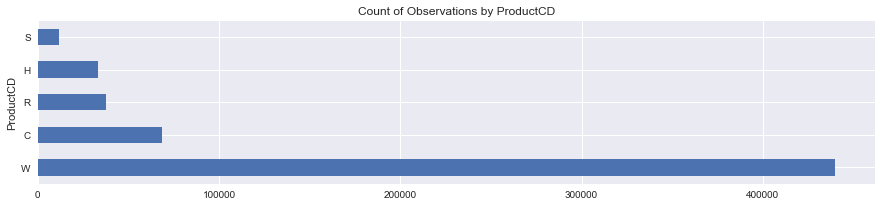

In [173]:
#product ID 分析
train.groupby(by = 'ProductCD')['TransactionID'].count().sort_values(ascending = False) \
    .plot(kind='barh',
          figsize=(15, 3),
          title='Count of Observations by ProductCD')
plt.show()

#在全部消费行为中 'W'商品占据绝大部分

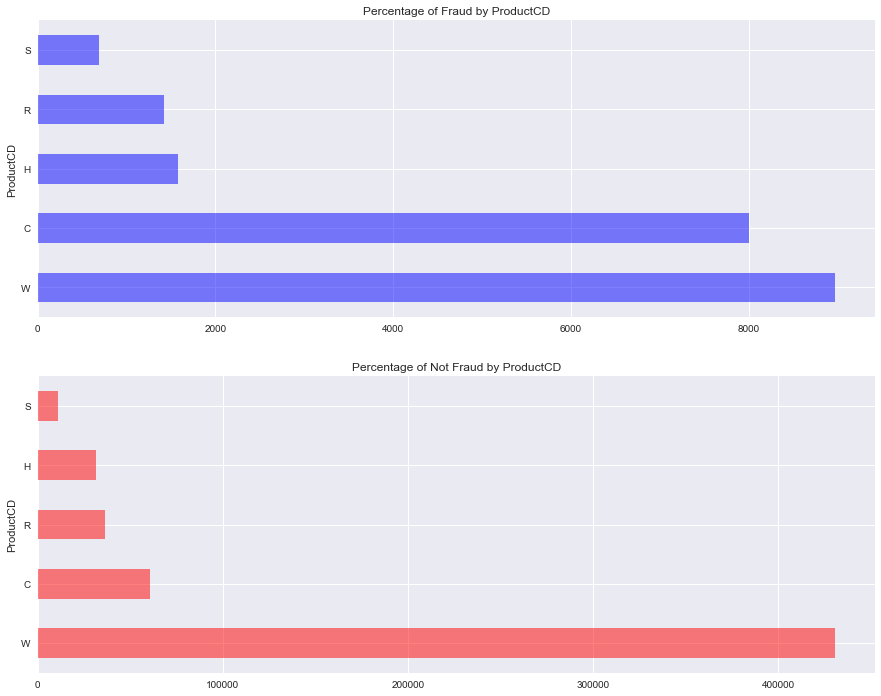

In [174]:
#product ID  划分fraud 和 not fraud
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (15,12))

train[train['isFraud'] == 1].groupby(by = 'ProductCD')['TransactionID'].count().sort_values(ascending = False) \
    .plot(kind='barh',
          color = 'blue',
          title='Percentage of Fraud by ProductCD',
          alpha = 0.5,
          ax = ax1)
train[train['isFraud'] == 0].groupby(by = 'ProductCD')['TransactionID'].count().sort_values(ascending = False) \
    .plot(kind='barh',
          color = 'red',
          alpha = 0.5,
          title='Percentage of Not Fraud by ProductCD',
          ax = ax2)
plt.show()

#发生欺诈行为的交易中 'C'商品比例远高于未发生欺诈行为的交易中'C'商品比例

In [175]:
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

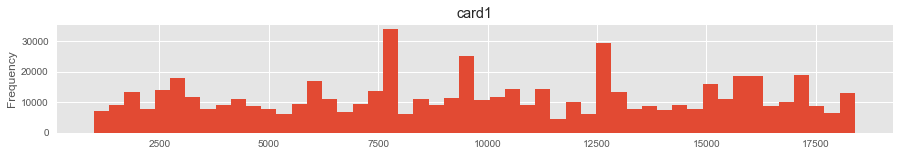

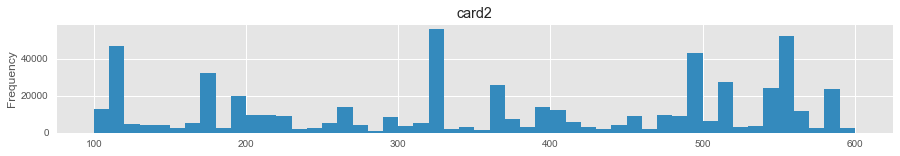

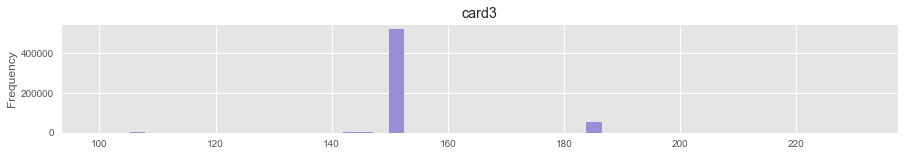

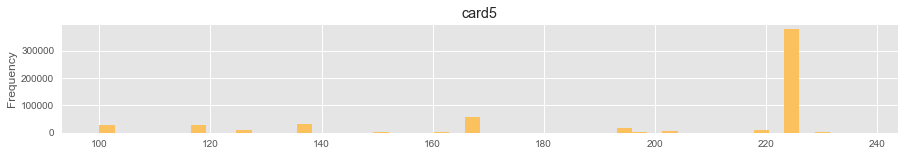

In [176]:
#card1-card6：交易卡信息
#数值类型
card_cols = [col for col in train.columns if 'card' in col]
color_idx = 0
for col in card_cols:
    if train[col].dtype in ['float64','int64']:
        train[col].plot(kind = 'hist',
                        title = col,
                        bins = 50,
                        figsize=(15, 2),
                        color=color_pal[color_idx]
                       )
    color_idx += 1
    plt.show()

In [177]:
train[card_cols].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


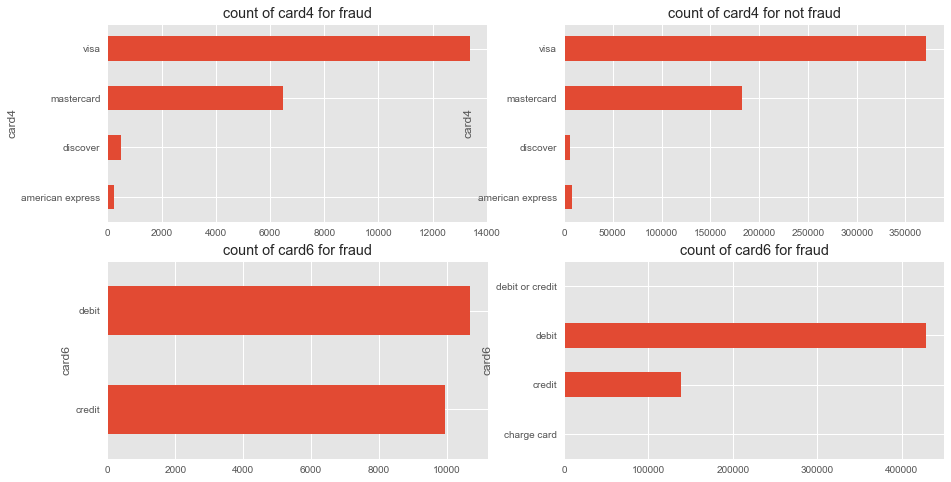

In [178]:
#card4 card6
train_card_fraud = train[train.isFraud == 1]
train_card_notfraud = train[train.isFraud == 0]
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize =(15,8))

train_card_fraud.groupby(by = 'card4').card4.count().plot(kind = 'barh',ax = ax1,title = 'count of card4 for fraud')
train_card_notfraud.groupby(by = 'card4').card4.count().plot(kind = 'barh',ax = ax2,title = 'count of card4 for not fraud')

train_card_fraud.groupby(by = 'card6').card6.count().plot(kind = 'barh',ax = ax3,title = 'count of card6 for fraud')
train_card_notfraud.groupby(by = 'card6').card6.count().plot(kind = 'barh',ax = ax4,title = 'count of card6 for fraud')

plt.show()

#card6中 欺诈行为和 非欺诈行为有显著差异
                                                    

In [179]:
#addr1 addr2：交易地点经纬？
#dist1 dist2 ：distance ？
#P_emaildomain 'R_emaildomain'：购买者和收件人的电子邮件域
#C1-C14：计数，例如发现与支付卡相关联的地址数等，实际含义被掩盖
#D1-D15：上次交易之间的天数等
#M1-M9：交易卡上信息
#V1-V339 ：？？排名计数

#P_emaildomain, R_emaildomain, M1 M2 M3 M4 M5 M6 M7 M8 M9

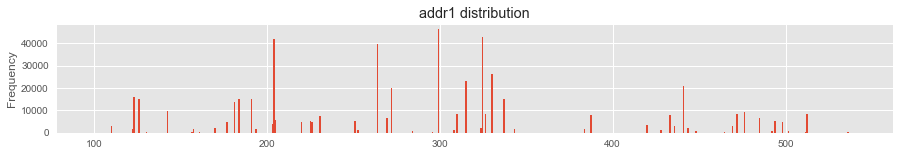

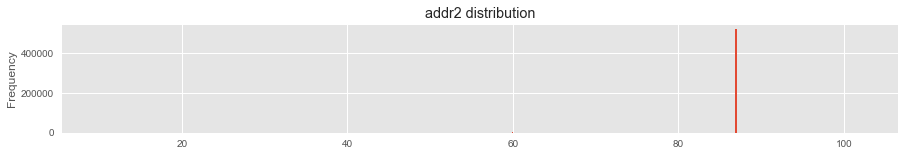

In [180]:
#addr1 addr2：
train['addr1'].plot(kind='hist',bins=500,figsize=(15, 2), title='addr1 distribution')
plt.show()
train['addr2'].plot(kind='hist',bins=500,figsize=(15, 2), title='addr2 distribution')
plt.show()

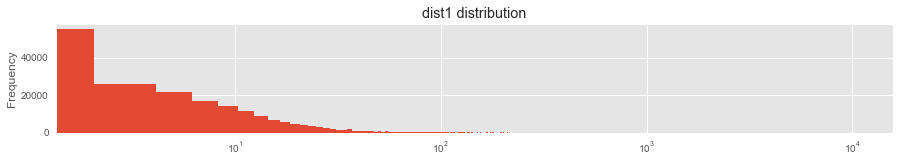

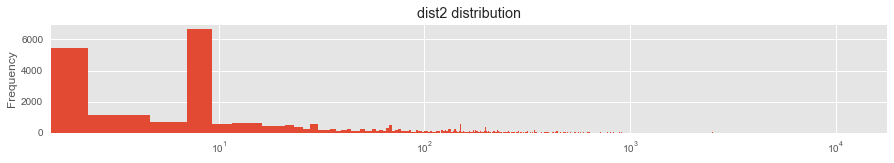

In [181]:
#dist1 dist2 
train['dist1'].plot(kind='hist',bins=5000,figsize=(15, 2), title='dist1 distribution',logx = True)
plt.show()
train['dist2'].plot(kind='hist',bins=5000,figsize=(15, 2), title='dist2 distribution',logx = True)
plt.show()

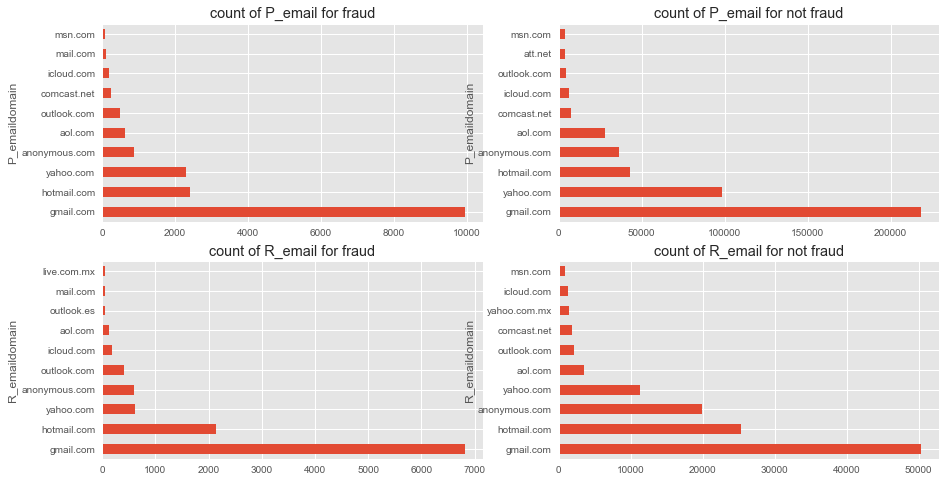

In [182]:
#train[['P_emaildomain','R_emaildomain']]
train_email_fraud = train[train.isFraud == 1]
train_email_notfraud = train[train.isFraud == 0]
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (15,8))
train_email_fraud.groupby(by = 'P_emaildomain').P_emaildomain.count().sort_values(ascending = False).head(10).plot(kind = 'barh',title = 'count of P_email for fraud',ax = ax1)
train_email_notfraud.groupby(by = 'P_emaildomain').P_emaildomain.count().sort_values(ascending = False).head(10).plot(kind = 'barh',title = 'count of P_email for not fraud',ax = ax2)

train_email_fraud.groupby(by = 'R_emaildomain').R_emaildomain.count().sort_values(ascending = False).head(10).plot(kind = 'barh',title = 'count of R_email for fraud',ax = ax3)
train_email_notfraud.groupby(by = 'R_emaildomain').R_emaildomain.count().sort_values(ascending = False).head(10).plot(kind = 'barh',title = 'count of R_email for not fraud',ax = ax4)
plt.show()

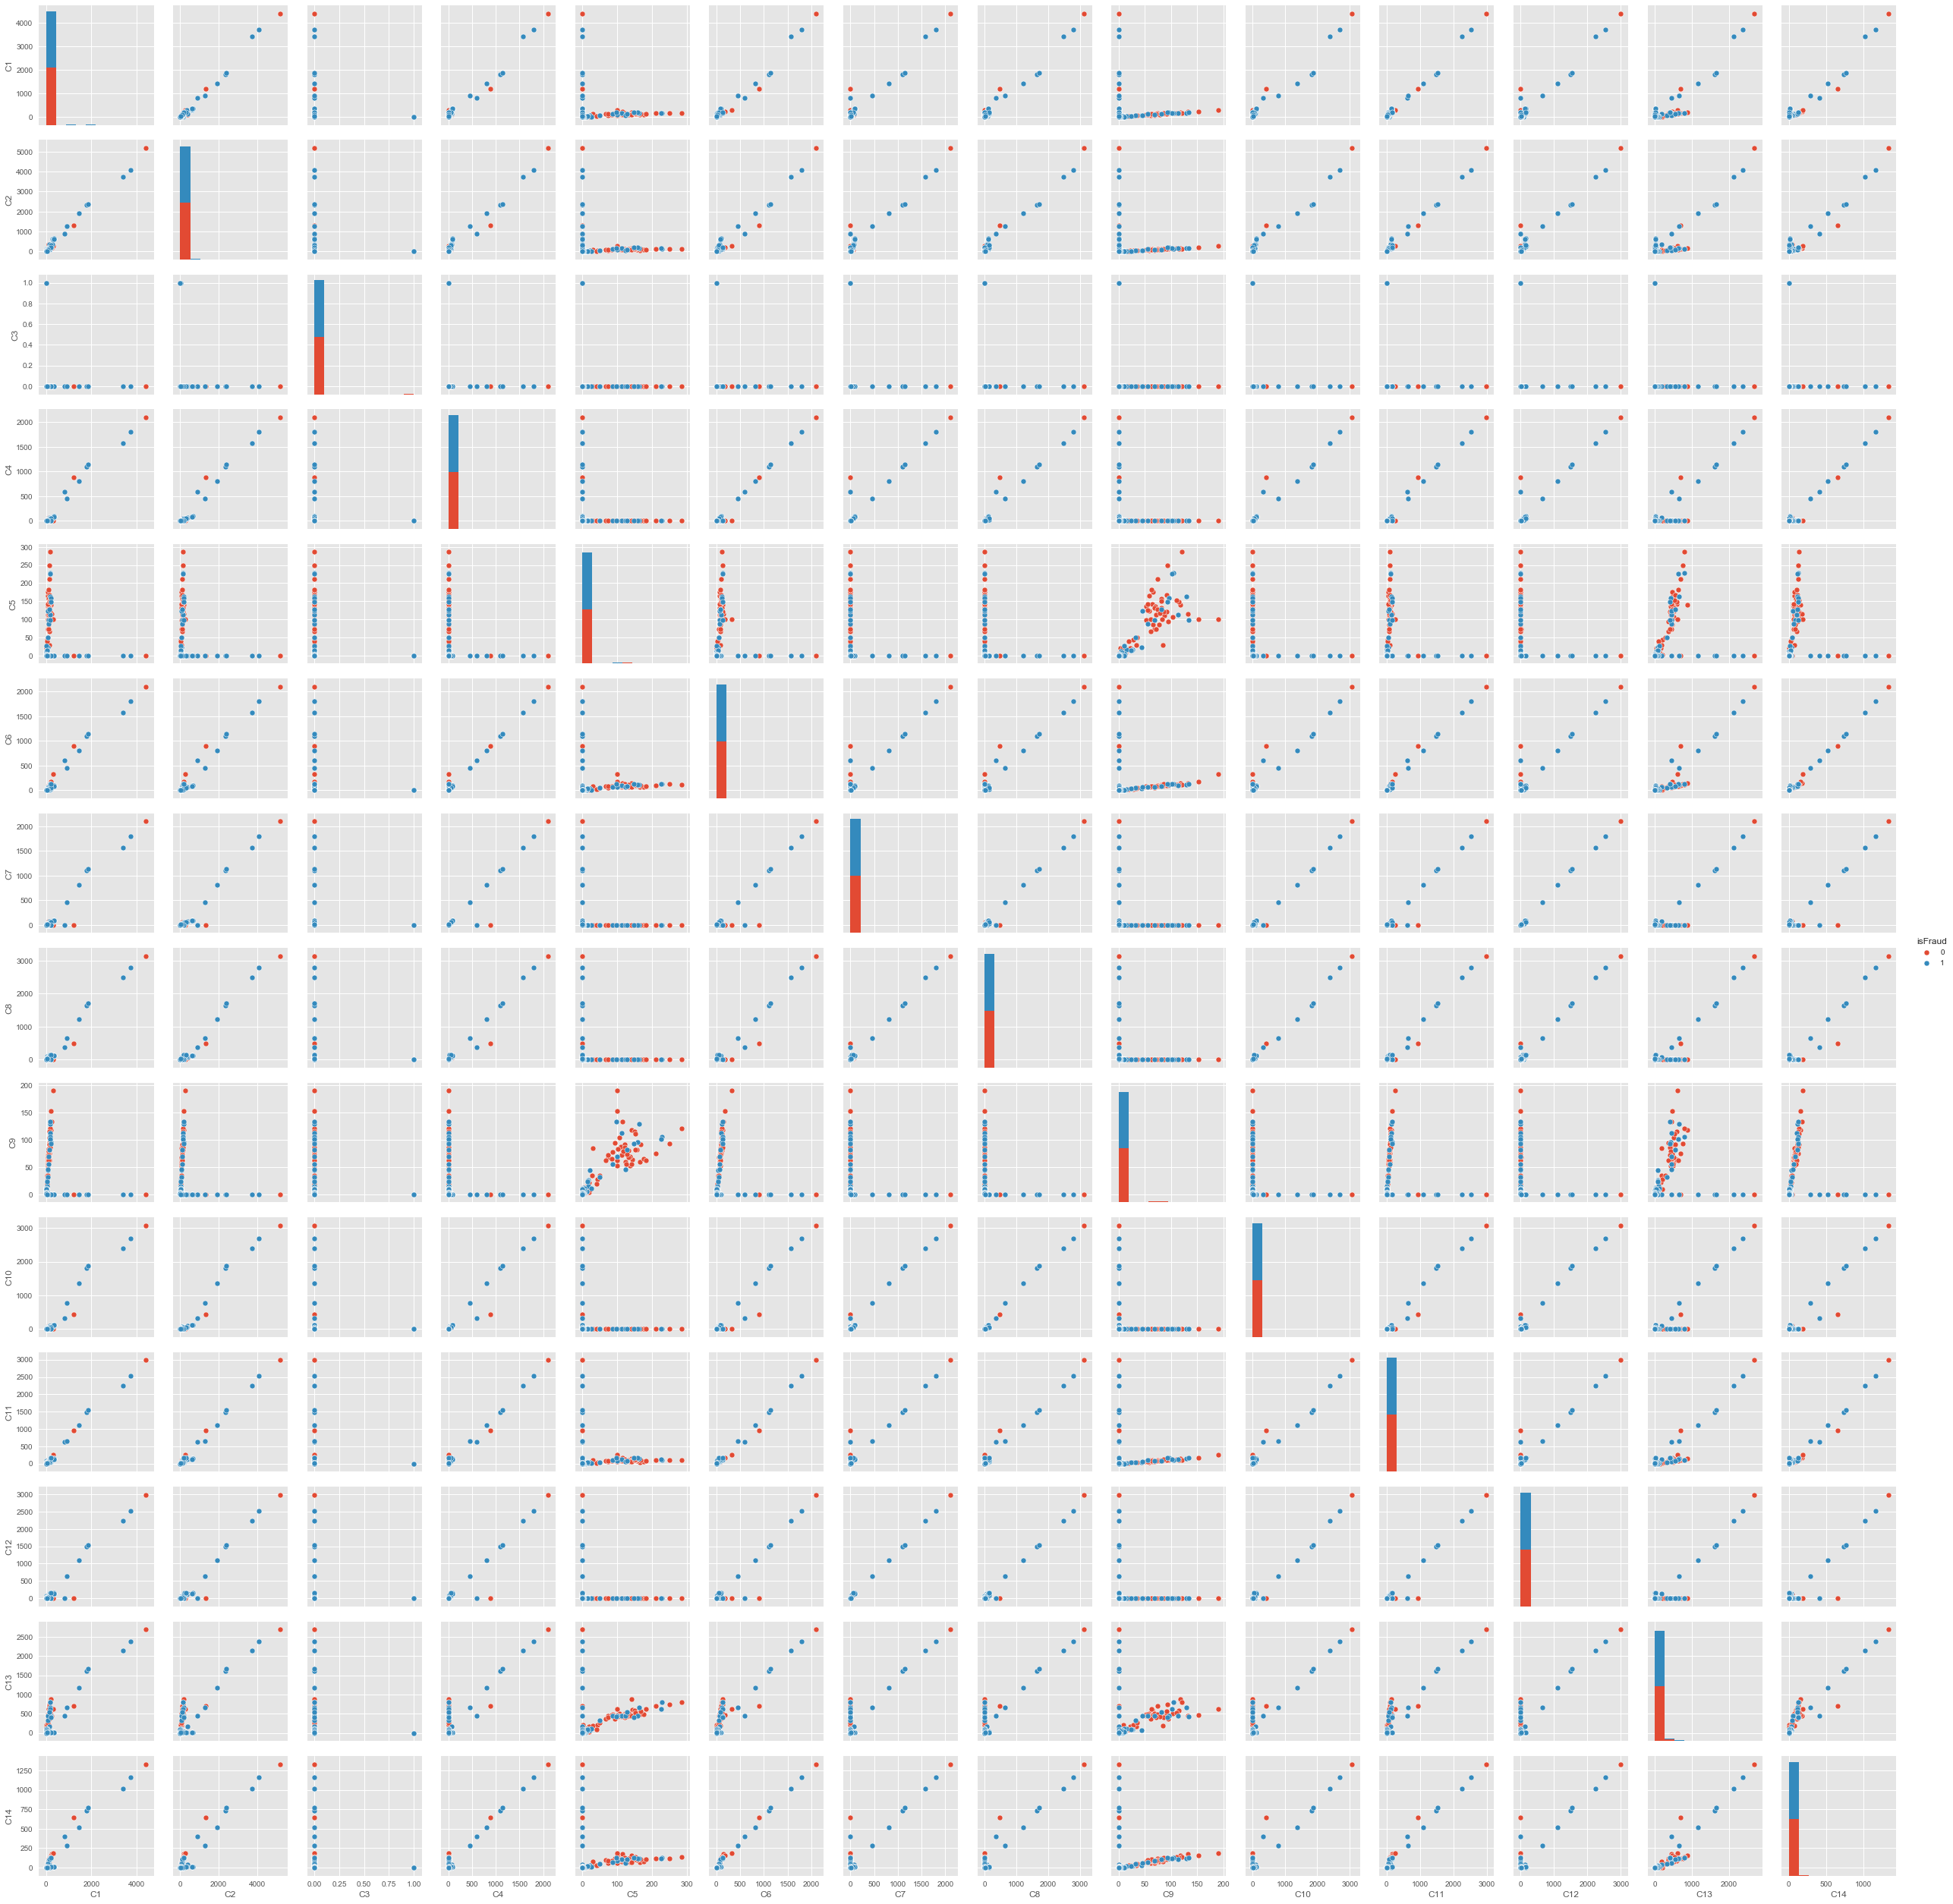

In [183]:
import seaborn as sns
#C1-C14不存在空值
c_cols = [c for c in train_transaction if c[0] == 'C']
sampled_train= pd.concat([train.loc[train['isFraud'] == 0].sample(1000),
                           train.loc[train['isFraud'] == 1].sample(1000)])

sns.pairplot(sampled_train, 
             hue='isFraud',
#              diag_kind='kde',
#              kind='reg',
             vars=c_cols)
plt.show()

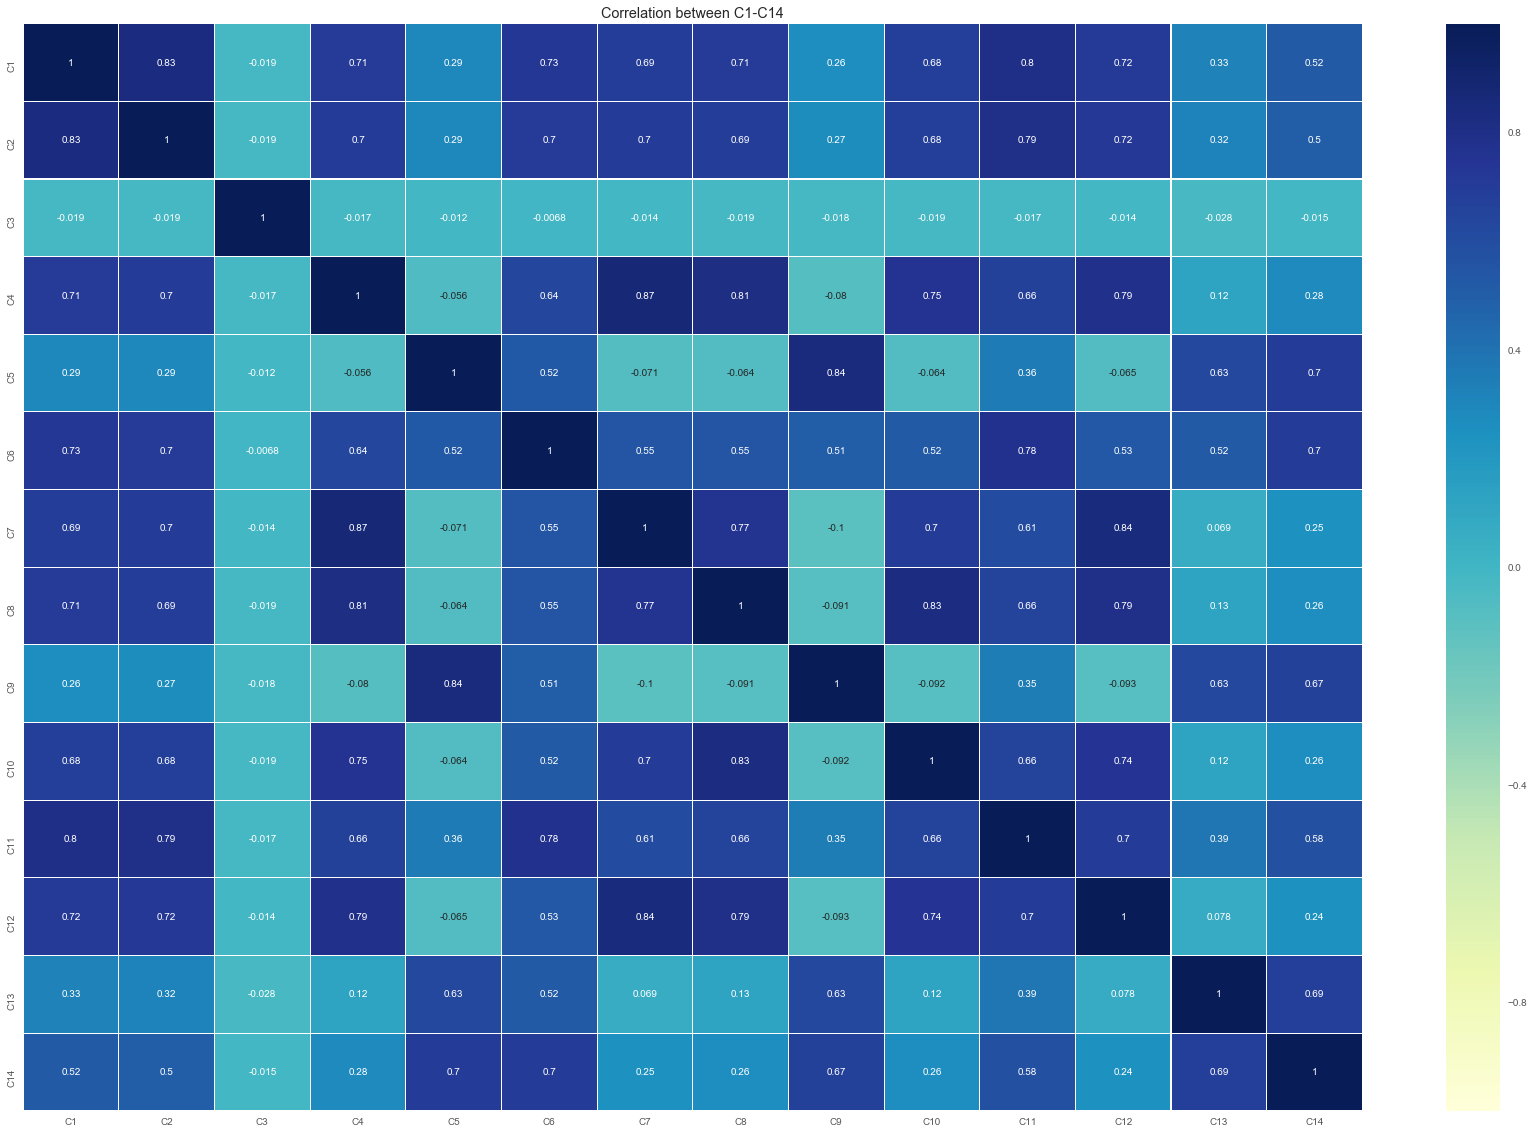

In [184]:
#相关系数
corr_sampled_train = sampled_train.apply(lambda x: pd.factorize(x)[0])
corr = corr_sampled_train.loc[:,'C1':'C14'].corr()
#相关性矩阵热力图
plt.figure(figsize=(30,20))
ax = sns.heatmap(corr,xticklabels=True,yticklabels=True,linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between C1-C14")
#多数之间存在较强的相关性

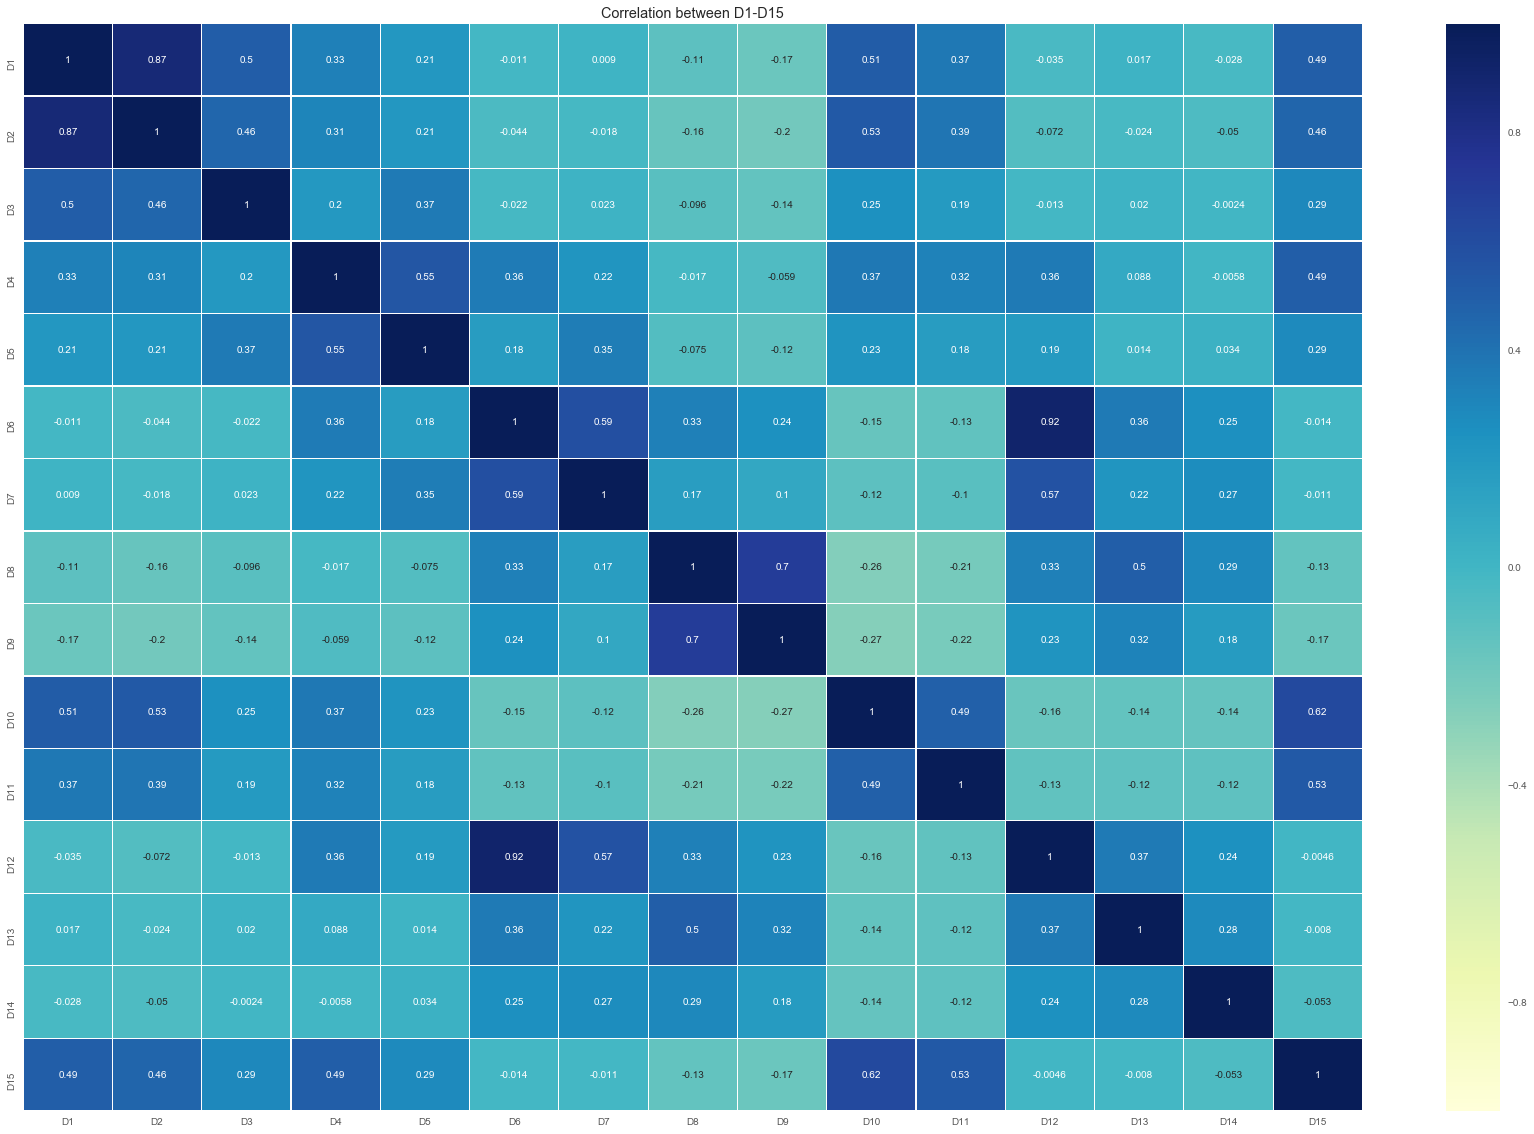

In [185]:
#D1-D15：上次交易之间的天数等
train.loc[:,"D1":"D15"].head()

d_cols = [i for i in train.columns if i[0] =='D' and i != 'DeviceType' and i != 'DeviceInfo']
corr = corr_sampled_train[d_cols].corr()
plt.figure(figsize=(30,20))
ax = sns.heatmap(corr,xticklabels=True,yticklabels=True,linewidths=0.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between D1-D15")

In [186]:
#M1-M9：交易卡上信息
M_cols = [m for m in train.columns if m[0] == 'M']
train[M_cols].head()
#除M4外 其余列都包括T F NAN

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F
3,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


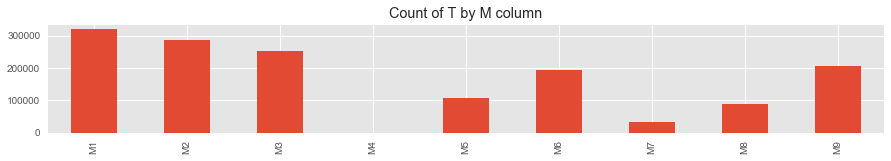

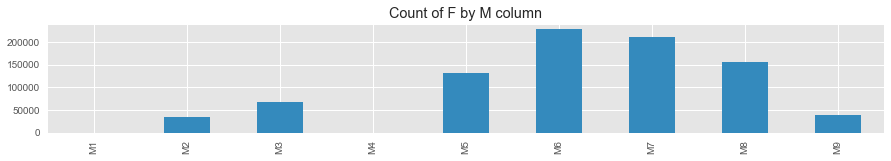

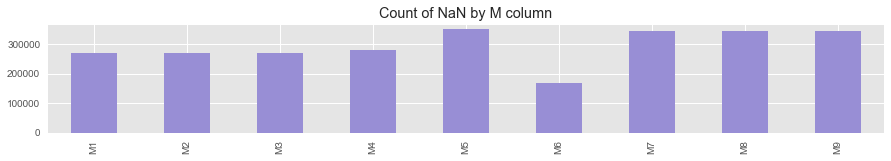

In [187]:
(train[M_cols] == 'T').sum().plot(kind = 'bar',figsize = (15,2),color = color_pal[0],title = 'Count of T by M column')
plt.show()
(train[M_cols] == 'F').sum().plot(kind = 'bar',figsize = (15,2),color = color_pal[1],title = 'Count of F by M column')
plt.show()
(train[M_cols].isnull()).sum().plot(kind = 'bar',figsize = (15,2),color = color_pal[2],title = 'Count of NaN by M column')
plt.show()

In [188]:
#v1-v339
v_cols = [v for v in train.columns if v[0] == 'V']

train['v_means'] = train[v_cols].mean(axis = 1)

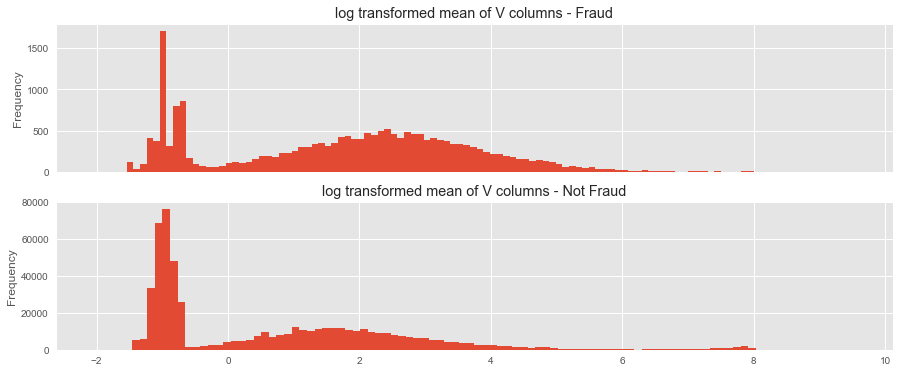

In [189]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (15,6),sharex=True)
train[train.isFraud == 1]['v_means'].apply(np.log).plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Fraud',
          ax=ax1)
train[train.isFraud == 0]['v_means'].apply(np.log).plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Not Fraud',
          ax=ax2)
plt.show()


#Easy Feature Engineering

In [199]:
# test_change_col = [col for col in test.columns if '-' in col]
# def changeTestCol(x):
#     return x.replace('-','_')

# test_new_col = []
# for col in test_change_col:
#     test_new_col.append(changeTestCol(col))
    
# test_new_col_dic = dict(zip(test_change_col,test_new_col))
# test_new_col_dic

# test.rename(columns = test_new_col_dic,inplace = True)
# test.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)

In [200]:
# print(train.shape)
# test.shape

(590540, 434)


(506691, 433)

In [201]:
# # TransactionAmt 的均值和方差
# train['TransactionAmt_to_card1_mean'] = train.TransactionAmt / train.groupby(['card1'])['TransactionAmt'].transform('mean')
# train['TransactionAmt_to_card4_mean'] = train.TransactionAmt / train.groupby(['card4'])['TransactionAmt'].transform('mean')
# train['TransactionAmt_to_card1_std'] = train.TransactionAmt / train.groupby(['card1'])['TransactionAmt'].transform('std')
# train['TransactionAmt_to_card4_std'] = train.TransactionAmt / train.groupby(['card4'])['TransactionAmt'].transform('std')

# test['TransactionAmt_to_card1_mean'] = test.TransactionAmt / test.groupby(['card1'])['TransactionAmt'].transform('mean')
# test['TransactionAmt_to_card4_mean'] = test.TransactionAmt / test.groupby(['card4'])['TransactionAmt'].transform('mean')
# test['TransactionAmt_to_card1_std'] = test.TransactionAmt / train.groupby(['card1'])['TransactionAmt'].transform('std')
# test['TransactionAmt_to_card4_std'] = test.TransactionAmt / train.groupby(['card4'])['TransactionAmt'].transform('std')


In [202]:
# #id_02 的均值和方差
# train['id_02_to_card1_mean'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
# train['id_02_to_card4_mean'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('mean')
# train['id_02_to_card1_std'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('std')
# train['id_02_to_card4_std'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('std')

# test['id_02_to_card1_mean'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
# test['id_02_to_card4_mean'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('mean')
# test['id_02_to_card1_std'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('std')
# test['id_02_to_card4_std'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('std')


In [203]:
# #D15 的均值和方差
# train['D15_to_card1_mean'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
# train['D15_to_card4_mean'] = train['D15'] / train.groupby(['card4'])['D15'].transform('mean')
# train['D15_to_card1_std'] = train['D15'] / train.groupby(['card1'])['D15'].transform('std')
# train['D15_to_card4_std'] = train['D15'] / train.groupby(['card4'])['D15'].transform('std')

# test['D15_to_card1_mean'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
# test['D15_to_card4_mean'] = test['D15'] / test.groupby(['card4'])['D15'].transform('mean')
# test['D15_to_card1_std'] = test['D15'] / test.groupby(['card1'])['D15'].transform('std')
# test['D15_to_card4_std'] = test['D15'] / test.groupby(['card4'])['D15'].transform('std')

In [204]:

# train['D15_to_addr1_mean'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('mean')
# train['D15_to_addr2_mean'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('mean')
# train['D15_to_addr1_std'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('std')
# train['D15_to_addr2_std'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('std')

# test['D15_to_addr1_mean'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('mean')
# test['D15_to_addr2_mean'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('mean')
# test['D15_to_addr1_std'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('std')
# test['D15_to_addr2_std'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('std')

In [206]:
# train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = train['P_emaildomain'].str.split('.', expand=True)
# train[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = train['R_emaildomain'].str.split('.', expand=True)
# test[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = test['P_emaildomain'].str.split('.', expand=True)
# test[['R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']] = test['R_emaildomain'].str.split('.', expand=True)

In [207]:
# print(train.shape)
# test.shape

(590540, 456)


(506691, 455)

In [208]:
# #缺失值占比>0.9 直接删除
# many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
# many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [209]:
# #若字段某取值占比>0.9 直接删除
# big_top_values_cols = [col for col in train.columns if train[col]\
#                        .value_counts(dropna=False, normalize=True).values[0] > 0.9]
# big_top_values_cols_test = [col for col in test.columns if test[col]\
#                        .value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [210]:
# cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_values_cols + \
#                         big_top_values_cols_test + one_value_cols+ one_value_cols_test))

# cols_to_drop.remove('isFraud')
# len(cols_to_drop)

84

In [211]:
# train_new = train.drop(cols_to_drop, axis=1)
# test_new = test.drop(cols_to_drop, axis=1)

In [216]:
# from sklearn.preprocessing import LabelEncoder
# cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
#             'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
#             'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9',
#             'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3']
# for col in cat_cols:
#     if col in train_new.columns:
#         le = LabelEncoder()
#         le.fit(list(train_new[col].astype(str).values) + list(test_new[col].astype(str).values))
#         train_new[col] = le.transform(list(train_new[col].astype(str).values))
#         test_new[col] = le.transform(list(test_new[col].astype(str).values))   

In [218]:
# X = train_new.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
# y = train_new.sort_values('TransactionDT')['isFraud']
# #X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
# X_test = test_new.drop(['TransactionDT', 'TransactionID'], axis=1)

# test = test_new[["TransactionDT", 'TransactionID']]

In [219]:
# def clean_inf_nan(df):
#     return df.replace([np.inf, -np.inf], np.nan)   

# # Cleaning infinite values to NaN
# X = clean_inf_nan(X)
# X_test = clean_inf_nan(X_test )

In [237]:
# from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold,GridSearchCV, train_test_split, TimeSeriesSplit
# from sklearn import metrics
# from sklearn.metrics import mean_absolute_error
# import lightgbm as lgb
# import xgboost as xgb
# import time



ImportError: cannot import name 'LGBMClassifier'

In [234]:
# def train_model_classification(X, X_test, y, params, folds, model_type='lgb', eval_metric='auc', columns=None, plot_feature_importance=False, model=None,
#                                verbose=10000, early_stopping_rounds=200, n_estimators=50000, splits=None, n_folds=3, averaging='usual', n_jobs=-1):
#     """
#     A function to train a variety of classification models.
#     Returns dictionary with oof predictions, test predictions, scores and, if necessary, feature importances.
    
#     :params: X - training data, can be pd.DataFrame or np.ndarray (after normalizing)
#     :params: X_test - test data, can be pd.DataFrame or np.ndarray (after normalizing)
#     :params: y - target
#     :params: folds - folds to split data
#     :params: model_type - type of model to use
#     :params: eval_metric - metric to use
#     :params: columns - columns to use. If None - use all columns
#     :params: plot_feature_importance - whether to plot feature importance of LGB
#     :params: model - sklearn model, works only for "sklearn" model type
    
#     """
#     columns = X.columns if columns is None else columns
#     n_splits = folds.n_splits if splits is None else n_folds
#     X_test = X_test[columns]
    
#     # to set up scoring parameters
#     metrics_dict = {'auc': {'lgb_metric_name': eval_auc,
#                         'catboost_metric_name': 'AUC',
#                         'sklearn_scoring_function': metrics.roc_auc_score},
#                     }
    
#     result_dict = {}
#     if averaging == 'usual':
#         # out-of-fold predictions on train data
#         oof = np.zeros((len(X), 1))

#         # averaged predictions on train data
#         prediction = np.zeros((len(X_test), 1))
        
#     elif averaging == 'rank':
#         # out-of-fold predictions on train data
#         oof = np.zeros((len(X), 1))

#         # averaged predictions on train data
#         prediction = np.zeros((len(X_test), 1))

    
#     # list of scores on folds
#     scores = []
#     feature_importance = pd.DataFrame()
    
#     # split and train on folds
#     for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
#         print(f'Fold {fold_n + 1} started at {time.ctime()}')
#         if type(X) == np.ndarray:
#             X_train, X_valid = X[columns][train_index], X[columns][valid_index]
#             y_train, y_valid = y[train_index], y[valid_index]
#         else:
#             X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
#             y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
            
#         if model_type == 'lgb':
#             model = lgb.LGBMClassifier(**params, n_estimators=n_estimators, n_jobs = n_jobs)
#             model.fit(X_train, y_train, 
#                     eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric=metrics_dict[eval_metric]['lgb_metric_name'],
#                     verbose=verbose, early_stopping_rounds=early_stopping_rounds)
            
#             y_pred_valid = model.predict_proba(X_valid)[:, 1]
#             y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)[:, 1]
            
#         if model_type == 'xgb':
#             train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
#             valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)

#             watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
#             model = xgb.train(dtrain=train_data, num_boost_round=n_estimators, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=verbose, params=params)
#             y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
#             y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
#         if model_type == 'sklearn':
#             model = model
#             model.fit(X_train, y_train)
            
#             y_pred_valid = model.predict(X_valid).reshape(-1,)
#             score = metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid)
#             print(f'Fold {fold_n}. {eval_metric}: {score:.4f}.')
#             print('')
            
#             y_pred = model.predict_proba(X_test)
        
#         if model_type == 'cat':
#             model = CatBoostClassifier(iterations=n_estimators, eval_metric=metrics_dict[eval_metric]['catboost_metric_name'], **params,
#                                       loss_function=Logloss)
#             model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

#             y_pred_valid = model.predict(X_valid)
#             y_pred = model.predict(X_test)
        
#         if averaging == 'usual':
            
#             oof[valid_index] = y_pred_valid.reshape(-1, 1)
#             scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
            
#             prediction += y_pred.reshape(-1, 1)

#         elif averaging == 'rank':
                                  
#             oof[valid_index] = y_pred_valid.reshape(-1, 1)
#             scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
                                  
#             prediction += pd.Series(y_pred).rank().values.reshape(-1, 1)        
        
#         if model_type == 'lgb' and plot_feature_importance:
#             # feature importance
#             fold_importance = pd.DataFrame()
#             fold_importance["feature"] = columns
#             fold_importance["importance"] = model.feature_importances_
#             fold_importance["fold"] = fold_n + 1
#             feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

#     prediction /= n_splits
    
#     print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
#     result_dict['oof'] = oof
#     result_dict['prediction'] = prediction
#     result_dict['scores'] = scores
    
#     if model_type == 'lgb':
#         if plot_feature_importance:
#             feature_importance["importance"] /= n_splits
#             cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
#                 by="importance", ascending=False)[:50].index

#             best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

#             plt.figure(figsize=(16, 12));
#             sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
#             plt.title('LGB Features (avg over folds)');
            
#             result_dict['feature_importance'] = feature_importance
#             result_dict['top_columns'] = cols
        
#     return result_dict


In [235]:
# def eval_auc(y_true, y_pred):
#     """
#     Fast auc eval function for lgb.
#     """
#     return 'auc', fast_auc(y_true, y_pred), True

In [239]:
# n_fold = 5
# folds = TimeSeriesSplit(n_splits=n_fold)
# folds = KFold(n_splits=5)

# params = {'num_leaves': 256,
#           'min_child_samples': 79,
#           'objective': 'binary',
#           'max_depth': 13,
#           'learning_rate': 0.03,
#           "boosting_type": "gbdt",
#           "subsample_freq": 3,
#           "subsample": 0.9,
#           "bagging_seed": 11,
#           "metric": 'auc',
#           "verbosity": -1,
#           'reg_alpha': 0.3,
#           'reg_lambda': 0.3,
#           'colsample_bytree': 0.9,
#           #'categorical_feature': cat_cols
#          }
# result_dict_lgb = train_model_classification(X=X, X_test=X_test, y=y, params=params, folds=folds, model_type='lgb', eval_metric='auc', plot_feature_importance=True,
#                                                       verbose=500, early_stopping_rounds=200, n_estimators=5000, averaging='usual', n_jobs=-1)


Fold 1 started at Thu Jun 18 20:12:27 2020


AttributeError: module 'lightgbm' has no attribute 'LGBMClassifier'